<a href="https://colab.research.google.com/github/mehular0ra/Pytorch-Tutorial/blob/main/Pytorch_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in the data
from sklearn.datasets import load_breast_cancer

In [3]:
# load the data
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.data.shape

(569, 30)

In [10]:
print(data.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
data.target.shape

(569,)

In [13]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
help(load_breast_cancer)

Help on function load_breast_cancer in module sklearn.datasets._base:

load_breast_cancer(*, return_X_y=False, as_frame=False)
    Load and return the breast cancer wisconsin dataset (classification).
    
    The breast cancer dataset is a classic and very easy binary classification
    dataset.
    
    =================   ==============
    Classes                          2
    Samples per class    212(M),357(B)
    Samples total                  569
    Dimensionality                  30
    Features            real, positive
    =================   ==============
    
    Read more in the :ref:`User Guide <breast_cancer_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    as_frame : bool, default=False
        If True, the data is a pandas DataFrame including c

In [66]:
# split the data into train and test set 
# using sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [67]:
# standardize (normalize) data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
N, D = X_train.shape

In [68]:
# build the logistic regression model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [69]:
# loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [70]:
# covert train and test data to float32 format
# in pytorch, float32 is by default initialized
# in numpy, float64 is by default initialized
train_inputs = torch.from_numpy(X_train.astype(np.float32))
train_targets = torch.from_numpy(y_train.astype(np.float32)).reshape(-1, 1)

test_inputs = torch.from_numpy(X_test.astype(np.float32))
test_targets = torch.from_numpy(y_test.astype(np.float32)).reshape(-1, 1)


In [71]:
n_epochs = 2000

# save the train and test losses
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    # zero the gradient parameters
    optimizer.zero_grad()

    # feed-forward (on training data)
    train_outputs = model(train_inputs)
    train_loss = criterion(train_outputs, train_targets)

    # backward and optimize
    train_loss.backward()
    optimizer.step()

    # get the test loss
    test_outputs = model(test_inputs)
    test_loss = criterion(test_outputs, test_targets)

    # save the losses
    train_losses[it] = train_loss.item()
    test_losses[it] = test_loss.item()

    # print the epoch number and the loss at that epoch at 5th iteration
    if (it+1) % 10  == 0:
        print(f'Epoch: {it+1}/{n_epochs}, Train loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    

Epoch: 10/2000, Train loss: 0.5381, Test Loss: 0.5490
Epoch: 20/2000, Train loss: 0.4912, Test Loss: 0.5061
Epoch: 30/2000, Train loss: 0.4518, Test Loss: 0.4695
Epoch: 40/2000, Train loss: 0.4186, Test Loss: 0.4381
Epoch: 50/2000, Train loss: 0.3905, Test Loss: 0.4108
Epoch: 60/2000, Train loss: 0.3664, Test Loss: 0.3868
Epoch: 70/2000, Train loss: 0.3455, Test Loss: 0.3656
Epoch: 80/2000, Train loss: 0.3272, Test Loss: 0.3468
Epoch: 90/2000, Train loss: 0.3110, Test Loss: 0.3301
Epoch: 100/2000, Train loss: 0.2966, Test Loss: 0.3151
Epoch: 110/2000, Train loss: 0.2836, Test Loss: 0.3015
Epoch: 120/2000, Train loss: 0.2719, Test Loss: 0.2892
Epoch: 130/2000, Train loss: 0.2613, Test Loss: 0.2779
Epoch: 140/2000, Train loss: 0.2516, Test Loss: 0.2676
Epoch: 150/2000, Train loss: 0.2428, Test Loss: 0.2581
Epoch: 160/2000, Train loss: 0.2346, Test Loss: 0.2493
Epoch: 170/2000, Train loss: 0.2271, Test Loss: 0.2411
Epoch: 180/2000, Train loss: 0.2202, Test Loss: 0.2336
Epoch: 190/2000, Tr

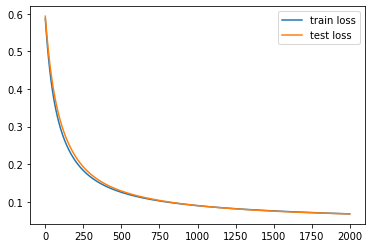

In [72]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [89]:
# get accuracy
with torch.no_grad():
  p_train = model(train_inputs)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(train_targets.numpy() == p_train)

  p_test = model(test_inputs)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(test_targets.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9869, Test acc: 0.9787


In [78]:
p_train = model(train_inputs)
print(type(p_train))

<class 'torch.Tensor'>
